In [21]:
import os
import sys
import csv
import pandas as pd
import numpy as np

import os.path
from os import path

import openslide
from skimage.color import rgb2hsv
import PIL
from PIL import Image

import cv2
import glob
import h5py
import os
import pathlib

import torch
from skimage import io, transform

import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from sklearn.metrics import r2_score
from geopy.geocoders import Nominatim
import scipy
from scipy.stats import linregress

In [2]:
fly = pd.read_csv("/home/irene/ISEF-Project-2023/citizendata.csv", encoding='latin-1')

In [3]:
fly

,id,time_observed_at,updated_at,quality_grade,license,url,image_url,captive_cultivated,place_guess,latitude,...,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,place_town_name,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name
0,104126073,2022-01-01 20:07:11 UTC,2022-01-15 23:20:47 UTC,research,NaN,https://www.inaturalist.org/observations/10412...,https://static.inaturalist.org/photos/17443906...,False,"Lake Rd, Newfield, NJ, US",39.574045,...,NaN,False,NaN,NaN,NaN,Gloucester,New Jersey,United States,New Jersey,Gloucester
1,104134747,2022-01-01 21:02:00 UTC,2022-01-15 19:15:32 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/10413...,https://inaturalist-open-data.s3.amazonaws.com...,False,"North Brunswick Township, NJ, USA",40.472869,...,NaN,False,NaN,NaN,NaN,Middlesex,New Jersey,United States,New Jersey,Middlesex
2,104139508,2022-01-01 18:40:47 UTC,2022-01-04 23:35:42 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/10413...,https://inaturalist-open-data.s3.amazonaws.com...,False,"Marysville, PA, US",40.312778,...,NaN,False,NaN,NaN,NaN,Perry,Pennsylvania,United States,Pennsylvania,Perry
3,104370012,2022-01-04 21:22:58 UTC,2022-01-04 23:29:43 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/10437...,https://inaturalist-open-data.s3.amazonaws.com...,False,"West Caln Township, PA, USA",40.039049,...,NaN,False,gps,gps,NaN,Chester,Pennsylvania,United States,Pennsylvania,Chester
4,104437824,2022-01-05 20:09:15 UTC,2022-01-17 08:43:24 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/10443...,https://inaturalist-open-data.s3.amazonaws.com...,False,"North Rd, Chester, NJ, US",40.790450,...,NaN,False,NaN,NaN,NaN,Morris,New Jersey,United States,New Jersey,Morris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,144338573,2022-12-13 15:02:00 UTC,2022-12-15 01:16:41 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/14433...,https://inaturalist-open-data.s3.amazonaws.com...,False,"Pennsylvania, US",40.686751,...,NaN,True,NaN,NaN,NaN,Dauphin,Pennsylvania,United States,Pennsylvania,Dauphin
9017,144366257,2022-12-14 16:19:58 UTC,2022-12-15 01:16:33 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/14436...,https://inaturalist-open-data.s3.amazonaws.com...,False,"Spuyten Duyvil, The Bronx, NY 10463, USA",40.876797,...,NaN,False,gps,gps,New York City,Bronx,New York,United States,New York,Bronx
9018,144379384,2022-09-17 15:12:00 UTC,2022-12-15 01:16:17 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/14437...,https://inaturalist-open-data.s3.amazonaws.com...,False,"Clarence Schock Memorial Park, Lebanon, Lebano...",40.239099,...,NaN,False,NaN,NaN,NaN,Lebanon,Pennsylvania,United States,Pennsylvania,Lebanon
9019,144421812,2022-10-27 14:30:00 UTC,2022-12-16 03:12:55 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/14442...,https://inaturalist-open-data.s3.amazonaws.com...,False,"Irvington, NY, USA",41.041403,...,NaN,False,NaN,NaN,NaN,Westchester,New York,United States,New York,Westchester


In [4]:
county = fly["place_county_name"]
state = fly["place_state_name"]
country = fly["place_country_name"]
f = []
for i in range(0,len(county)):
    f.append(str(county[i]+", "+state[i]+", "+country[i]))


In [5]:
f

['Gloucester, New Jersey, United States',
 'Middlesex, New Jersey, United States',
 'Perry, Pennsylvania, United States',
 'Chester, Pennsylvania, United States',
 'Morris, New Jersey, United States',
 'Hudson, New Jersey, United States',
 'Morris, New Jersey, United States',
 'Chester, Pennsylvania, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Kings, New York, United States',
 'Cumberland, Pennsylvania, United States',
 'Middlesex, New Jersey, United States',
 'Middlesex, New Jersey, United States',
 'Middlesex, New Jersey, United States',
 'Middlesex, New Jersey, United States',
 'Middlesex, New Jersey, United States',
 'Kings, New York, United States',
 'Gloucester,

In [6]:
FDict = {}
for i in f:
    if i in FDict.keys():
        FDict[i] += 1
    else:
        FDict[i] = 1
    

In [7]:
FDict

{'Gloucester, New Jersey, United States': 48,
 'Middlesex, New Jersey, United States': 250,
 'Perry, Pennsylvania, United States': 11,
 'Chester, Pennsylvania, United States': 123,
 'Morris, New Jersey, United States': 400,
 'Hudson, New Jersey, United States': 115,
 'Kings, New York, United States': 659,
 'Cumberland, Pennsylvania, United States': 84,
 'Montgomery, Pennsylvania, United States': 152,
 'Lancaster, Pennsylvania, United States': 92,
 'Hunterdon, New Jersey, United States': 68,
 'Juniata, Pennsylvania, United States': 7,
 'Allegheny, Pennsylvania, United States': 580,
 'Somerset, New Jersey, United States': 117,
 'Queens, New York, United States': 297,
 'New Castle, Delaware, United States': 159,
 'Bucks, Pennsylvania, United States': 44,
 'Richmond, New York, United States': 208,
 'Camden, New Jersey, United States': 103,
 'Philadelphia, Pennsylvania, United States': 408,
 'New York, New York, United States': 1640,
 'Mercer, New Jersey, United States': 113,
 'Essex, New J

In [8]:
tree = pd.read_csv("/home/irene/ISEF-Project-2023/treemappings.csv", encoding='latin-1')

/home/irene/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15,18,22,23,25,26,27,38,39,40,41,42,43,45,47,49,53,54,60,61,63,69,70,71,72,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
t = []
for i in tree['Location']:
    w = i[1:]
    w = w[:-1]
    t.append(w)
t

['Tuscarawas, Ohio, United States',
 'Los Angeles, California, United States',
 'Autauga, Alabama, United States',
 'Boulder, Colorado, United States',
 'Suffolk, New York, United States',
 'Shelby, Ohio, United States',
 'Middlesex, Massachusetts, United States',
 'Baker, Florida, United States',
 'Lee, Alabama, United States',
 'Lee, Alabama, United States',
 'Lee, Alabama, United States',
 'Lee, Alabama, United States',
 'Wilson, Tennessee, United States',
 'Van Buren, Tennessee, United States',
 'Rutherford, Tennessee, United States',
 'Rutherford, Tennessee, United States',
 'Rutherford, Tennessee, United States',
 'Rutherford, Tennessee, United States',
 'Rutherford, Tennessee, United States',
 'Rutherford, Tennessee, United States',
 'Maury, Tennessee, United States',
 'Knox, Tennessee, United States',
 'Hawkins, Tennessee, United States',
 'Cumberland, Tennessee, United States',
 'Claiborne, Tennessee, United States',
 'Carter, Tennessee, United States',
 'Coffee, Tennessee, Un

In [10]:
TDict = {}
for i in t:
    if i in TDict.keys():
        TDict[i] += 1
    else:
        TDict[i] = 1
#Using dataframe to aggragate (group buy)

In [11]:
TDict

{'Tuscarawas, Ohio, United States': 3,
 'Los Angeles, California, United States': 508,
 'Autauga, Alabama, United States': 2,
 'Boulder, Colorado, United States': 39,
 'Suffolk, New York, United States': 510,
 'Shelby, Ohio, United States': 2,
 'Middlesex, Massachusetts, United States': 45,
 'Baker, Florida, United States': 1,
 'Lee, Alabama, United States': 10,
 'Wilson, Tennessee, United States': 37,
 'Van Buren, Tennessee, United States': 13,
 'Rutherford, Tennessee, United States': 46,
 'Maury, Tennessee, United States': 43,
 'Knox, Tennessee, United States': 64,
 'Hawkins, Tennessee, United States': 7,
 'Cumberland, Tennessee, United States': 25,
 'Claiborne, Tennessee, United States': 4,
 'Carter, Tennessee, United States': 11,
 'Coffee, Tennessee, United States': 307,
 'Cannon, Tennessee, United States': 46,
 'Davidson, Tennessee, United States': 86,
 'Hardin, Kentucky, United States': 7,
 'Rockcastle, Kentucky, United States': 8,
 'Fayette, Kentucky, United States': 7,
 'Berks,

In [12]:
L = []
T = []
F = []
for i in TDict.keys():
    if i in FDict.keys():
        L.append(i)
        T.append(TDict[i])
        F.append(FDict[i])

In [47]:
T_F = []
F_F = []
O = ""
for (l,t,f) in zip(L, T, F):
    if t < 1000:
        T_F.append(t)
        F_F.append(f)
    else: 
        O = l

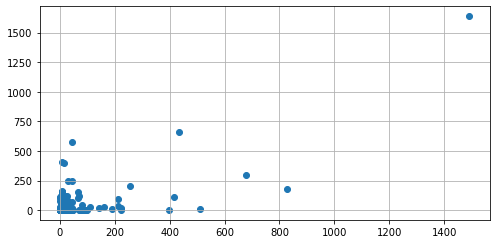

In [50]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x = T
y = F
plt.grid()
plt.scatter(x, y, marker='o');
plt.show()
#having x_lim, y_lim visually no correlation

In [51]:
slope, intercept, r, p, se = linregress(x,y)
#linear regression is very sensitive to outliers

In [52]:
slope

0.6888245579855644

In [53]:
intercept

19.295659374430556

In [54]:
r*r

0.49529571331823646

In [55]:
p

3.472957119500902e-21

In [56]:
se

0.06075180508814755

In [57]:
r2 = r2_score(x,y)
r2

0.4196188689325536

In [ ]:
#A little report about the data inconsistency, to open source data collection projects

In [ ]:
#Metadata appended
#Look for a paper that propose --> benchmarks that assess accuracy 
#EfficientNet